In [44]:
import pandas as pd

# this function is used to display tables in a neat way
from IPython.display import display

In [45]:
# read the csv files
apple=pd.read_csv('apple.csv')
microsoft=pd.read_csv('microsoft.csv')

In [46]:
# in this cell we convert the Date collumn to the datetime type, and make it the index
# this is done so we can automatically have the x-axis on line plots be a date
# see https://stackoverflow.com/questions/37610983/how-set-column-as-date-index
apple['Date']=pd.to_datetime(apple['Date'])
microsoft['Date']=pd.to_datetime(microsoft['Date'])
apple.set_index('Date',inplace=True)
microsoft.set_index('Date',inplace=True)

In [47]:
# take a look at the shape and first few rows of each dataset
print (apple.shape)
print (microsoft.shape)

display (apple.head())
display (microsoft.head())

(8640, 5)
(7312, 5)


,Open,High,Low,Close,Volume
Date,,,,,
2015-02-23,130.02,133.00,129.66,133.00,67871830.0
2015-02-20,128.62,129.50,128.05,129.50,48948419.0
2015-02-19,128.48,129.03,128.33,128.45,37362381.0
2015-02-18,127.62,128.78,127.45,128.72,44891737.0
2015-02-17,127.49,128.88,126.92,127.83,63152405.0


,Open,High,Low,Close,Volume
Date,,,,,
2015-02-23,43.70,44.19,43.65,44.15,32518754.0
2015-02-20,43.51,43.88,43.29,43.86,29721133.0
2015-02-19,43.18,43.53,43.05,43.50,27603420.0
2015-02-18,43.63,43.70,43.39,43.53,27111657.0
2015-02-17,43.97,44.00,43.19,43.58,33695749.0


In [48]:
# here we join the datasets together.  This is done so in the next step we can see both on the same plot 
fboth=apple.join(microsoft, lsuffix='apple', rsuffix='microsoft')
display(fboth.head())

,Openapple,Highapple,Lowapple,Closeapple,Volumeapple,Openmicrosoft,Highmicrosoft,Lowmicrosoft,Closemicrosoft,Volumemicrosoft
Date,,,,,,,,,,
2015-02-23,130.02,133.00,129.66,133.00,67871830.0,43.70,44.19,43.65,44.15,32518754.0
2015-02-20,128.62,129.50,128.05,129.50,48948419.0,43.51,43.88,43.29,43.86,29721133.0
2015-02-19,128.48,129.03,128.33,128.45,37362381.0,43.18,43.53,43.05,43.50,27603420.0
2015-02-18,127.62,128.78,127.45,128.72,44891737.0,43.63,43.70,43.39,43.53,27111657.0
2015-02-17,127.49,128.88,126.92,127.83,63152405.0,43.97,44.00,43.19,43.58,33695749.0


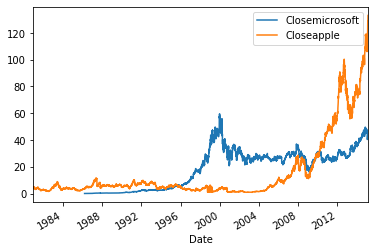

In [49]:
# now let's plot microsoft and apple closing price on the same plot
%matplotlib inline
fboth.plot.line(y=['Closemicrosoft', 'Closeapple'])

In [53]:
fboth['absdifapple']=(abs(fboth['Highapple']-fboth['Lowapple'])/fboth['Lowapple'])
fboth['volnormapple']=fboth['Volumeapple']/fboth['Volumeapple'].max()

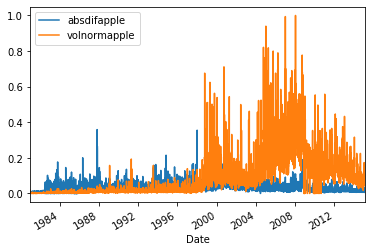

In [54]:
fboth.plot.line(y=['absdifapple','volnormapple'])